In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
with open('../bch.63.51.log', 'r') as f:
    ans = {'offset': [], 'N': [], 'K': [], 'SNR_in_db': [], 'BER': [], 'FER': []}
    for line in f:
        line = line.split()
        ans['offset'].append(line[1])
        ans['N'].append(int(line[2].split('=')[-1]))
        ans['K'].append(int(line[3].split('=')[-1]))
        ans['SNR_in_db'].append(float(line[4].split('=')[-1]))
        ans['BER'].append(float(line[5].split('=')[-1]))
        ans['FER'].append(float(line[6].split('=')[-1]))

In [3]:
df = pd.DataFrame(ans)

In [4]:
os = df['offset'].unique()
print(os)

['-0.4' '0.0' '0.4' '0.8' '1.0' '1.2' '1.6' '2.0' '2.4']


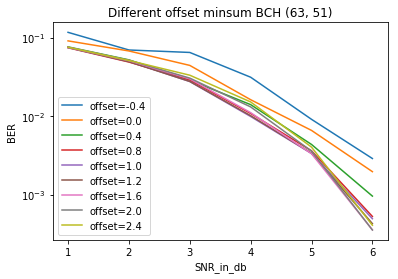

In [5]:
fig, ax = plt.subplots()
for o in os:
    sub_df = df[df['offset']==o]
    ax.plot(sub_df['SNR_in_db'], sub_df['BER'], label="offset={}".format(o))
ax.legend()
ax.set_yscale('symlog', linthreshy=1e-6)
ax.set_ylabel('BER')
ax.set_xlabel('SNR_in_db')
ax.set_title('Different offset minsum BCH (63, 51)')
plt.show()